# Exploratory Data Analysis: Global Plastic Waste (2023)

### Objective
This project explores patterns in **plastic consumption, waste generation, and mismanagement** across countries in 2023.  
The goal is to answer:  
- Which countries contribute the most to plastic use and waste?  
- How do per-capita trends differ from total consumption trends?  
- Which nations have the highest levels of **mismanaged plastic waste** (both absolute and relative)?  
- What does this reveal about global waste management capacity?  


### Dataset Description

The primary dataset used is from **World Population Review (2023)**, containing information on plastic use and waste by country.  

**Columns included:**  
- `Total Plastic Use (2023, Tons)` – total plastic consumed by each country.  
- `Plastic Use per Person (2023, KG)` – per-capita plastic use.  
- `Total Waste Produced (2023, Tons)` – estimated total plastic waste generated.  
- `Waste per Person (2023, kg)` – waste per person, derived from total waste and population.  
- `Mismanaged Waste (2023, Tons)` – total mismanaged plastic waste.  
- `Mismanaged Waste % (2023)` – percentage of waste that is mismanaged.  
- `Population (2023)` – country population estimate.  

**Dataset Size:**  
- Number of rows: 212  
- Number of columns: 8  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns


## Loading Datasets

In [2]:
df_mwi = pd.read_csv("plastic-pollution-by-country-2025.csv")
df_pc = pd.read_csv("plastic-consumption-by-country-2025.csv")

# Merging both datasets on country
df_merged = pd.merge(df_mwi, df_pc, on=["flagCode", "country"])
df_merged.set_index("country", inplace=True)

# Dropping unecessary columns
df_merged.drop(columns="MWILevel_2023", inplace=True)

df_merged.head()



,flagCode,MismanagedWasteIndex_2023,TotalPlasticConsumption_2023,MismanagedWasteExpected_2023,PerCapitaPlasticConsumption_2023
country,,,,,
Afghanistan,AF,98.06,447766,439097,11.5
Albania,AL,69.90,109725,76692,38.7
Algeria,DZ,12.82,2092007,268285,48.1
American Samoa,AS,53.03,2431,1289,52.6
Andorra,AD,44.77,4859,2176,62.5


### Data Check
Quick shape/columns check and float display prefs (commas, no decimals for large integers).


In [3]:
print(df_merged.shape)
print(df_merged.columns)
pd.set_option("display.float_format", "{:,.0f}".format)  # no decimals, comma separator

(212, 5)
Index(['flagCode', 'MismanagedWasteIndex_2023', 'TotalPlasticConsumption_2023',
       'MismanagedWasteExpected_2023', 'PerCapitaPlasticConsumption_2023'],
      dtype='object')


In [4]:
# Renaming columns for clarity
df_merged = df_merged.rename(columns={
    "flagCode": "Country Code",
    "MismanagedWasteIndex_2023": "Mismanaged Waste % (2023)",
    "TotalPlasticConsumption_2023": "Total Plastic Use (2023, Tons)",
    "MismanagedWasteExpected_2023": "Mismanaged Waste (2023, Tons)",
    "PerCapitaPlasticConsumption_2023": "Plastic Use per Person (2023, KG)",
})

### Converting text columns to numeric
Some numeric columns arrived as strings (with commas)


In [5]:
# Converting text to numbers
df_merged["Mismanaged Waste (2023, Tons)"] = pd.to_numeric(df_merged["Mismanaged Waste (2023, Tons)"], errors="coerce")
df_merged["Mismanaged Waste % (2023)"] = pd.to_numeric(df_merged["Mismanaged Waste % (2023)"], errors="coerce")

### Derived Data
Computing **Total Waste Produced** from mismanaged waste and mismanagement rate.
Computing **Population** from Total plastic waste and plastic waste per person.
Computing **Waste per Person** from Total Waste Produced and Population



In [6]:
# Calculating Total Waste
df_merged["Total Waste Produced (2023, Tons)"] = (df_merged["Mismanaged Waste (2023, Tons)"] / (df_merged["Mismanaged Waste % (2023)"] / 100))


df_merged["Population (2023)"] = (df_merged["Total Plastic Use (2023, Tons)"] * 1000 / df_merged["Plastic Use per Person (2023, KG)"])

df_merged["Waste per Person (2023, kg)"] = (df_merged["Total Waste Produced (2023, Tons)"] * 1000 / df_merged["Population (2023)"])



df_merged.head()

,Country Code,Mismanaged Waste % (2023),"Total Plastic Use (2023, Tons)","Mismanaged Waste (2023, Tons)","Plastic Use per Person (2023, KG)","Total Waste Produced (2023, Tons)",Population (2023),"Waste per Person (2023, kg)"
country,,,,,,,,
Afghanistan,AF,98,447766,"439,097",12,"447,784","38,936,174",12
Albania,AL,70,109725,"76,692",39,"109,717","2,835,271",39
Algeria,DZ,13,2092007,"268,285",48,"2,092,707","43,492,869",48
American Samoa,AS,53,2431,"1,289",53,"2,431","46,217",53
Andorra,AD,45,4859,"2,176",62,"4,860","77,744",63


### Nulls & data fixes
Identify remaining nulls / zeros; apply targeted fixes if needed (documented below).


In [7]:
mask = df_merged.isnull() | (df_merged == 0)

print(mask.sum().sum()) # number of null cells
df_merged[mask.any(axis=1)] # affected rows

4


,Country Code,Mismanaged Waste % (2023),"Total Plastic Use (2023, Tons)","Mismanaged Waste (2023, Tons)","Plastic Use per Person (2023, KG)","Total Waste Produced (2023, Tons)",Population (2023),"Waste per Person (2023, kg)"
country,,,,,,,,
Namibia,NaN,96,31516,"30,120",13,"31,516","2,481,575",13
Sao Tome and Principe,ST,88,2727,NaN,12,NaN,"218,160",NaN


In [8]:
df_merged.dropna(subset=df_merged.columns.difference(["Country Code"]))
df_merged[mask.any(axis=1)]

,Country Code,Mismanaged Waste % (2023),"Total Plastic Use (2023, Tons)","Mismanaged Waste (2023, Tons)","Plastic Use per Person (2023, KG)","Total Waste Produced (2023, Tons)",Population (2023),"Waste per Person (2023, kg)"
country,,,,,,,,
Namibia,NaN,96,31516,"30,120",13,"31,516","2,481,575",13
Sao Tome and Principe,ST,88,2727,NaN,12,NaN,"218,160",NaN


In [9]:
# Setting Namibia's country code to "NA"
df_merged.loc[df_merged.index == "Namibia", "Country Code"] = "NA"


In [10]:
df_merged.describe().T

,count,mean,std,min,25%,50%,75%,max
Mismanaged Waste % (2023),212,61,36,0,22,74,96,100
"Total Plastic Use (2023, Tons)",212,"771,852","3,119,078",460,"23,720","141,862","473,718","37,606,230"
"Mismanaged Waste (2023, Tons)",211,"323,579","873,334",14,"8,309","63,784","264,354","7,300,752"
"Plastic Use per Person (2023, KG)",212,39,41,1,13,27,48,328
"Total Waste Produced (2023, Tons)",211,"781,764","3,125,628",458,"24,180","150,261","476,308","37,600,597"
Population (2023),212,"36,744,588","141,316,198","11,059","791,911","6,640,059","25,841,811","1,408,473,034"
"Waste per Person (2023, kg)",211,204,"2,386",1,13,28,49,"34,694"


### Outlier Check
- Ran an outlier check on *Waste per Person (2023, kg)* to identify unusual values.  
- Found **Poland** with an unrealistically high value (~34,694 kg/person).  
- Inspection showed this was due to a typo in `Total Plastic Use (2023, Tons)` (1,315 instead of 1,315,000).  
- Corrected the value manually.


In [11]:
col = "Waste per Person (2023, kg)"

# Calculate Q1, Q3, and IQR
Q1 = df_merged[col].quantile(0.25)
Q3 = df_merged[col].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df_merged[(df_merged[col] < lower_bound) | (df_merged[col] > upper_bound)]

print("Outlier countries based on Waste per Person (2023, kg):")
print(outliers[["Country Code", col]])


Outlier countries based on Waste per Person (2023, kg):
                         Country Code  Waste per Person (2023, kg)
country                                                           
Aruba                              AW                          110
Barbados                           BB                          106
Bermuda                            BM                          169
Faroe Islands                      FO                          155
Guam                               GU                          104
Hong Kong                          HK                          168
Iceland                            IS                          129
Israel                             IL                          105
Macau                              MO                          328
Moldova                            MD                          151
Mongolia                           MN                          128
Northern Mariana Islands           MP                          109
Palau 

In [12]:
df_merged.loc["Poland"]

Country Code                               PL
Mismanaged Waste % (2023)                  13
Total Plastic Use (2023, Tons)           1315
Mismanaged Waste (2023, Tons)         177,365
Plastic Use per Person (2023, KG)          35
Total Waste Produced (2023, Tons)   1,314,789
Population (2023)                      37,896
Waste per Person (2023, kg)            34,694
Name: Poland, dtype: object

In [13]:
# Manual change of value
df_merged.loc["Poland", "Total Plastic Use (2023, Tons)"] = 1315000


In [14]:
# Recalculating Population and Waste per Person after manual change

df_merged["Population (2023)"] = (df_merged["Total Plastic Use (2023, Tons)"] * 1000 / df_merged["Plastic Use per Person (2023, KG)"])
df_merged["Waste per Person (2023, kg)"] = (df_merged["Total Waste Produced (2023, Tons)"] * 1000 / df_merged["Population (2023)"])


In [15]:
df_merged.loc["Poland"]

Country Code                                PL
Mismanaged Waste % (2023)                   13
Total Plastic Use (2023, Tons)         1315000
Mismanaged Waste (2023, Tons)          177,365
Plastic Use per Person (2023, KG)           35
Total Waste Produced (2023, Tons)    1,314,789
Population (2023)                   37,896,254
Waste per Person (2023, kg)                 35
Name: Poland, dtype: object

### Final check: structure & ranges
Confirm dtypes, descriptive stats.


In [16]:
df_merged.info()
df_merged.describe().T


<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, Afghanistan to Zimbabwe
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country Code                       212 non-null    object 
 1   Mismanaged Waste % (2023)          212 non-null    float64
 2   Total Plastic Use (2023, Tons)     212 non-null    int64  
 3   Mismanaged Waste (2023, Tons)      211 non-null    float64
 4   Plastic Use per Person (2023, KG)  212 non-null    float64
 5   Total Waste Produced (2023, Tons)  211 non-null    float64
 6   Population (2023)                  212 non-null    float64
 7   Waste per Person (2023, kg)        211 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 23.0+ KB


,count,mean,std,min,25%,50%,75%,max
Mismanaged Waste % (2023),212,61,36,0,22,74,96,100
"Total Plastic Use (2023, Tons)",212,"778,048","3,118,845",460,"23,969","146,224","475,551","37,606,230"
"Mismanaged Waste (2023, Tons)",211,"323,579","873,334",14,"8,309","63,784","264,354","7,300,752"
"Plastic Use per Person (2023, KG)",212,39,41,1,13,27,48,328
"Total Waste Produced (2023, Tons)",211,"781,764","3,125,628",458,"24,180","150,261","476,308","37,600,597"
Population (2023),212,"36,923,165","141,293,511","11,059","808,992","6,707,893","26,427,332","1,408,473,034"
"Waste per Person (2023, kg)",211,39,41,1,13,28,48,328


### Exploratory Data Analysis (EDA)

The analysis is divided into three parts:  
1. **Consumption & Waste** – who uses and produces the most plastic, both in totals and per person.  
2. **Mismanagement** – who mismanages the most plastic, in both absolute and relative terms.  
3. **Distributions & Comparisons** – how consumption, waste, and mismanagement vary globally.  

Each section includes visualizations with **interpretation of results**.  


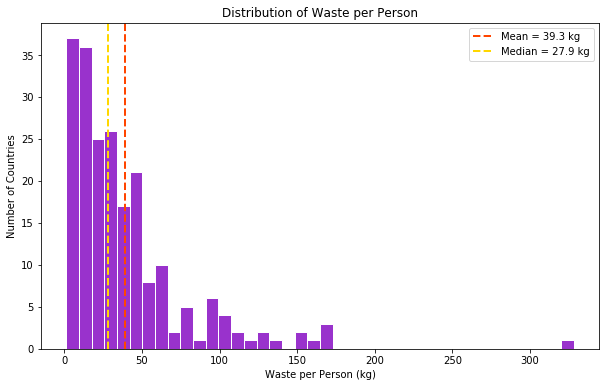

In [17]:

# Plot 1

col = "Waste per Person (2023, kg)"


plt.figure(figsize=(10,6))
plt.hist(df_merged[col].dropna(), bins = 40, edgecolor = "white", color = "darkorchid")


mean_value = df_merged[col].mean()
median_value = df_merged[col].median()

plt.axvline(mean_value, color="orangered", linestyle="dashed", linewidth=2, label=f"Mean = {mean_value:.1f} kg")
plt.axvline(median_value, color="gold", linestyle="dashed", linewidth=2, label=f"Median = {median_value:.1f} kg")


plt.xlabel("Waste per Person (kg)")
plt.ylabel("Number of Countries")
plt.title("Distribution of Waste per Person")

plt.legend()
plt.show()

**Insights:**
- The distribution is right-skewed, with most countries generating less than approximately 50 kg/person annually.  
- The **median (27.9 kg)** is notably lower than the **mean (39.3 kg)**, highlighting the impact of high-waste outliers.  
- A handful of countries exceed 100 kg/person annually, with one extreme case above 300 kg/person.
- This pattern highlights the unequality, most countries contribute modestly per person, but a few high-consumption nations disproportionately raise the global average.


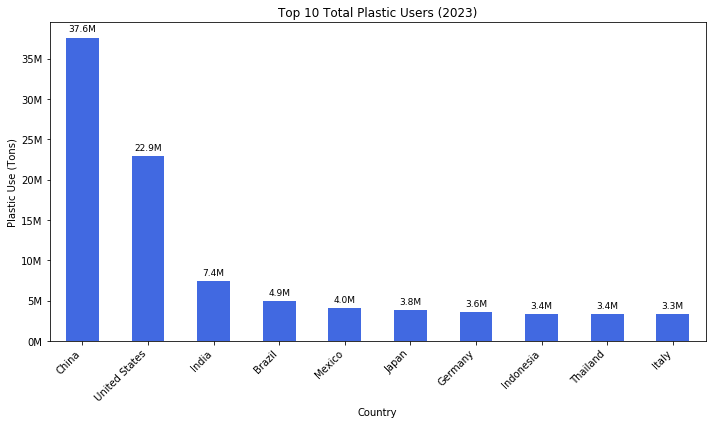

In [18]:
# Plot 2

col = "Total Plastic Use (2023, Tons)"

top10_total_user = df_merged.nlargest(10, col)

gph = top10_total_user.plot.bar(y=col, legend=False, figsize=(10,6), color="royalblue")

plt.title("Top 10 Total Plastic Users (2023)")
plt.ylabel("Plastic Use (Tons)")
plt.xlabel("Country")
plt.xticks(rotation=45, ha="right")


gph.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x/1e6:.0f}M"))

# Add value labels on top of bars
for i, val in enumerate(top10_total_user[col]):
    gph.text(i, val + 5e5, f"{val/1e6:.1f}M", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()


**Insights:**
- **China (37.6M tons)** and the **United States (22.9M tons)** dominate global plastic use, far exceeding other countries.  
- Together, these two account for well over half of the world’s top-10 consumption.  
- **India (7.4M tons)**, despite having the world's largest population, consumes much less in absolute terms than China or the U.S.  
- This ranking reflects **scale of population**, countries with massive populations naturally use more in total.  


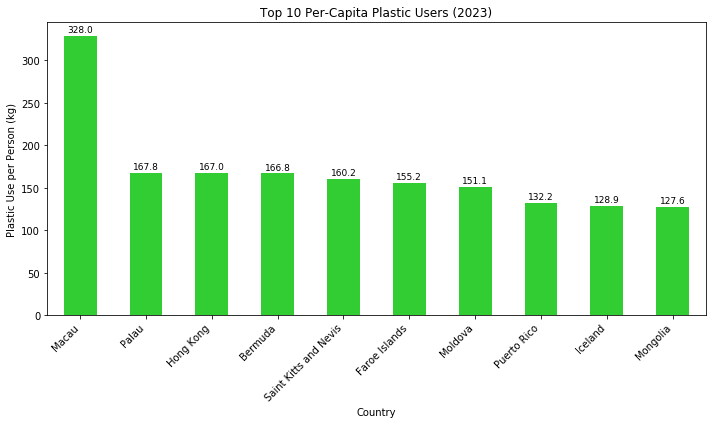

In [19]:

# Plot 3

col = "Plastic Use per Person (2023, KG)"
top10_pc_user = df_merged.nlargest(10, col)

gph = top10_pc_user.plot.bar(y=col, legend=False, figsize=(10,6), color="limegreen")

plt.title("Top 10 Per-Capita Plastic Users (2023)")
plt.ylabel("Plastic Use per Person (kg)")
plt.xlabel("Country")
plt.xticks(rotation=45, ha="right")

# Add value labels on top of bars
for i, val in enumerate(top10_pc_user[col]):
    gph.text(i, val + 2, f"{val:.1f}", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

**Insights:**
- **Macau (328 kg/person)** stands out dramatically, using nearly double the plastic per person compared to the next country.  
- Other top per-capita consumers include **Palau (167.8), Hong Kong (167.0), and Bermuda (166.8)** — mostly small or high-income regions.  
- These figures are far above the global average (~39 kg/person from Plot 1).  
- This highlights how **scale and intensity differ**: large populations dominate in totals, but the per-capita leaders are **smaller populations**, where usage intensity is disproportionately high relative to population size.  


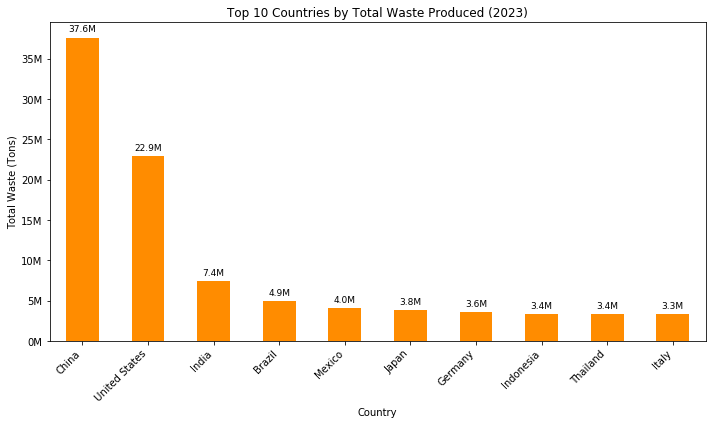

In [20]:
# Plot 4

col = "Total Waste Produced (2023, Tons)"
top10_total_waste = df_merged.nlargest(10, col)

gph = top10_total_waste.plot.bar(y=col, legend=False, figsize=(10,6), color="darkorange")

plt.title("Top 10 Countries by Total Waste Produced (2023)")
plt.ylabel("Total Waste (Tons)")
plt.xlabel("Country")
plt.xticks(rotation=45, ha="right")


gph.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x/1e6:.0f}M"))

# Add value labels on top of bars
for i, val in enumerate(top10_total_waste[col]):
    gph.text(i, val + 5e5, f"{val/1e6:.1f}M", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()






**Insights:**
- The ranking is almost identical to total plastic use (Plot 2), showing that consumption translates almost directly into waste generation. 
- This step makes clear that high consumption translates almost directly into high waste volumes, setting the stage for examining how much of this waste is **properly managed vs. mismanaged**. 


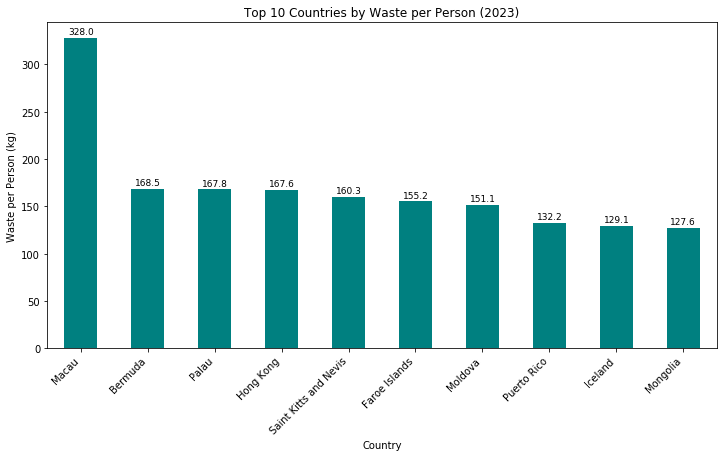

In [21]:
# Plot 5

col_percap = "Waste per Person (2023, kg)"
top10_percap_waste = df_merged.nlargest(10, col_percap)

gph = top10_percap_waste.plot.bar(y=col_percap, legend=False, figsize=(12,6), color="teal")

plt.title("Top 10 Countries by Waste per Person (2023)")
plt.ylabel("Waste per Person (kg)")
plt.xlabel("Country")
plt.xticks(rotation=45, ha="right")

for i, val in enumerate(top10_percap_waste[col_percap]):
    gph.text(i, val + 2, f"{val:.1f}", ha="center", va="bottom", fontsize=9)

plt.show()

**Insights:**
- **Macau (328 kg/person)** leads by a wide margin, producing nearly double the waste per person compared to the next highest countries, similar to plastic consumption.


7300752.0


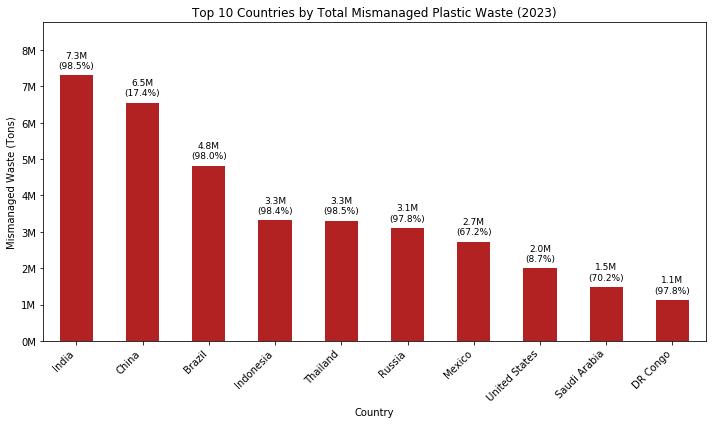

In [22]:
# Plot 6

col_mis_total = "Mismanaged Waste (2023, Tons)"
col_mis_pct = "Mismanaged Waste % (2023)"
top10_mis_total = df_merged.nlargest(10, col_mis_total)

gph = top10_mis_total.plot.bar(y=col_mis_total, legend=False, figsize=(10,6), color="firebrick")


plt.title("Top 10 Countries by Total Mismanaged Plastic Waste (2023)")
plt.ylabel("Mismanaged Waste (Tons)")
plt.xlabel("Country")
plt.xticks(rotation=45, ha="right")

ymax = top10_mis_total[col_mis_total].max()
print(ymax)
gph.set_ylim(0, ymax * 1.2)

gph.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x/1e6:.0f}M"))

for i, (val, pct) in enumerate(zip(top10_mis_total[col_mis_total], top10_mis_total[col_mis_pct])):
    gph.text(i, val + (ymax * 0.02), f"{val/1e6:.1f}M\n({pct:.1f}%)", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

**Insights:**
- **India (7.3M tons)**, **China (6.5M tons)** and **Brazil (4.8M tons)** top the list of mismanaged plastic waste in absolute terms.  
- This chart highlights that mismanagement is not only about how much plastic is consumed, but also about the **capacity of national waste management systems** to handle it effectively.  
- **India (7.3M tons, 98.5%)** and **Brazil (4.8M tons, 98.0%)** show extremely high mismanagement rates, meaning nearly all plastic waste generated ends up improperly handled.  
- **China (6.5M tons, 17.4%)** produces a large volume but mismanages a much smaller share relative to its scale, reflecting stronger waste-handling capacity and infrastructure.  
- **The U.S. (2.0M tons, 8.7%)** appears in the top 10 by volume, but with one of the lowest mismanagement rates, reflecting more effective systems and infrastructure.  
- Countries like **Indonesia (98.4%)**, **Thailand (98.5%)**, and **DR Congo (97.8%)** also highlight regions where weak infrastructure drives extremely high mismanagement risk.  
- Overall, the data shows that the **global challenge is twofold**:  
  - **Scale problem** - massive plastic waste generators.  
  - **System problem** - insufficient waste management infrastructure leading to high leakage.


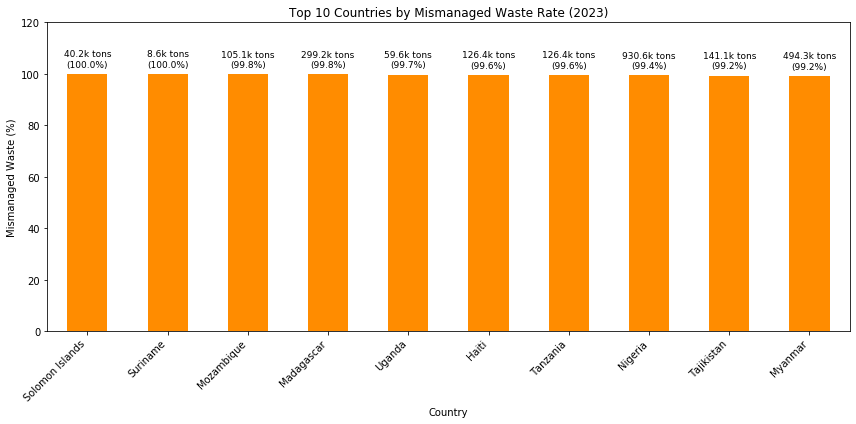

In [23]:
# Plot 7

col_mis_pct = "Mismanaged Waste % (2023)"
col_mis_total = "Mismanaged Waste (2023, Tons)"
top10_mis_pct = df_merged.nlargest(10, col_mis_pct)

gph = top10_mis_pct.plot.bar(y=col_mis_pct, legend=False, figsize=(12,6), color="darkorange")

plt.title("Top 10 Countries by Mismanaged Waste Rate (2023)")
plt.ylabel("Mismanaged Waste (%)")
plt.xlabel("Country")
plt.xticks(rotation=45, ha="right")

ymax = top10_mis_pct[col_mis_pct].max()
gph.set_ylim(0, ymax * 1.2)

# Label with both tons + percentage
for i, (tons, pct) in enumerate(zip(top10_mis_pct[col_mis_total], top10_mis_pct[col_mis_pct])):
    gph.text(i, pct + (ymax * 0.02), f"{tons/1e3:.1f}k tons\n({pct:.1f}%)", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()


**Insights:**  
- These countries record **near-100% mismanagement rates**, showing an almost complete absence of functioning waste management systems.  
- Nations like **Nigeria (930k tons, 99%)** and **Myanmar (494k tons, 99%)** stand out where both **volume and rate are critically high**, amplifying environmental risks.  
- The findings highlight that **systemic weakness, not just absolute waste volumes**, can turn countries into mismanagement hotspots when infrastructure is lacking.  


### Conclusion

Key findings from this EDA:  
- Plastic use and waste are highly concentrated: **China, the U.S., and India** dominate in absolute totals.  
- Per-capita measures tell a different story: small or wealthy regions like **Macau, Bermuda, and Palau** have the highest per-person waste footprints.  
- **India and Brazil** show extremely high mismanagement rates (~98%), while **China and the U.S.** generate massive totals but mismanage a much smaller share.  
- Several nations face **near-100% mismanagement** despite producing relatively small waste volumes, an indication of absent waste management infrastructure.  

Overall, the global plastic waste challenge is **twofold**:  
- **Scale problem** - massive waste generators like China, India, and the U.S.  
- **System problem** - countries with insufficient infrastructure that mismanage nearly all plastic waste produced.  

This analysis demonstrates how combining **totals, per-capita measures, and mismanagement efficiency** gives a more complete picture of global plastic pollution.  



## Conclusion
- Totals are concentrated in a few large economies (China, U.S., India); per-capita leaders are small/high-consumption regions.  
- Mismanagement shows two problems: **scale** (big generators) and **system capacity** (near-100% MWI in some countries).  
- Combining totals, per-capita metrics, and mismanagement % yields a fuller picture than any single view.
